In [ ]:
import pandas as pd
data = pd.read_csv("/content/stock_data.csv")
print(data)

           Date  Closing Price (in USD) Event
0    2025-08-19                  151.58   NaN
1    2025-08-20                  151.81   NaN
2    2025-08-21                  152.45   NaN
3    2025-08-22                  152.69   NaN
4    2025-08-23                  154.16   NaN
..          ...                     ...   ...
360  2026-08-14                  441.03   NaN
361  2026-08-15                  441.14   NaN
362  2026-08-16                  442.10   NaN
363  2026-08-17                  443.53   NaN
364  2026-08-18                  444.30   NaN

[365 rows x 3 columns]


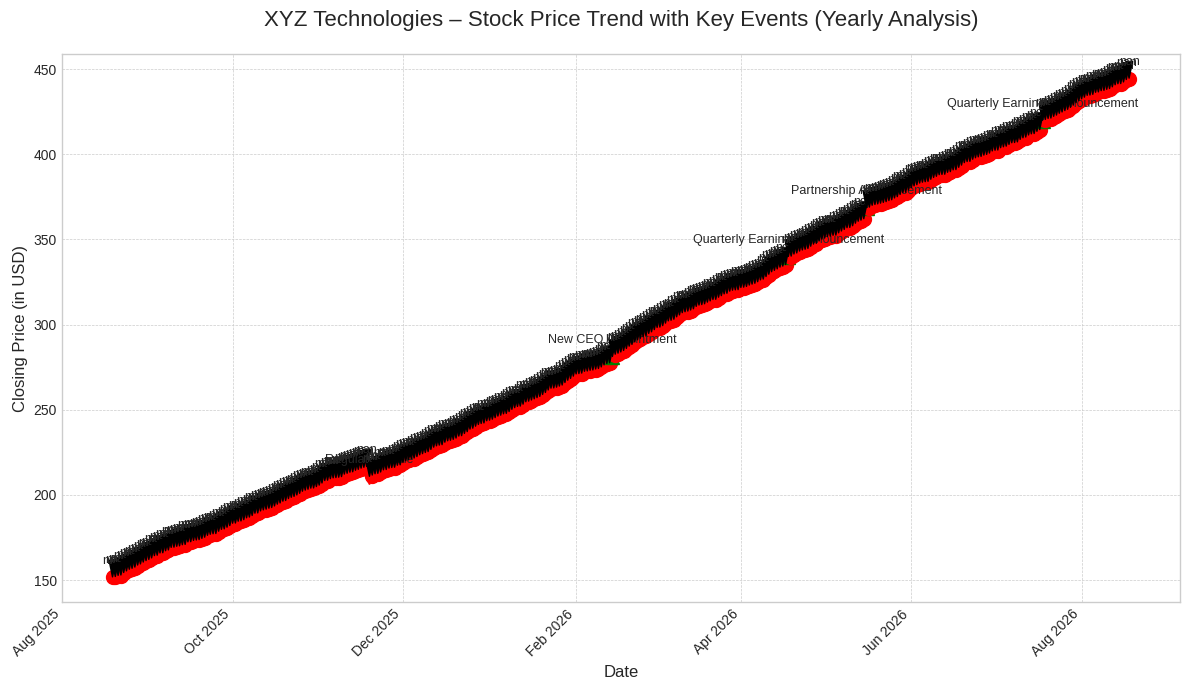

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = '/content/stock_data.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df['Date'], df['Closing Price (in USD)'], color='#1f77b4', linewidth=2)

ax.set_title("XYZ Technologies – Stock Price Trend with Key Events (Yearly Analysis)", fontsize=16, pad=20)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Closing Price (in USD)", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

event_markers = {
    'New CEO Appointment': 'g^',
    'Partnership Announcement': 'g^',
    'Quarterly Earnings Announcement': 'g^',
    'Regulatory Fine': 'rv'
}

for index, row in df.iterrows():
    if row['Event'] != "":
        event_type = row['Event']
        marker = event_markers.get(event_type, 'ro')

        ax.plot(row['Date'], row['Closing Price (in USD)'], marker, markersize=10, label=event_type)

        ax.annotate(event_type,
                    (row['Date'], row['Closing Price (in USD)']),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9,
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
